In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline

In [2]:
data = xr.open_dataset('sst.nc')
data

<xarray.Dataset>
Dimensions:    (time: 1851, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2024-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    10/5/2024 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [3]:
#selection of ONI/nino 3.4 region values
ONI= data.sel(latitude=slice(5,-5), longitude=slice(-170,-120))
print(ONI)

<xarray.Dataset>
Dimensions:    (time: 1851, nv: 2, latitude: 10, longitude: 50)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2024-0...
  * latitude   (latitude) float32 4.5 3.5 2.5 1.5 0.5 -0.5 -1.5 -2.5 -3.5 -4.5
  * longitude  (longitude) float32 -169.5 -168.5 -167.5 ... -122.5 -121.5 -120.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    10/5/2024 converted to netcdf from pp format
    supplementary_information:  Updates and supplemen

In [4]:
#finding anomalies in value
mean_oni = ONI.groupby('time.month').mean('time')

# finding anomaly
anomaly =ONI.groupby('time.month')-mean_oni
anomaly

weights = np.cos(np.deg2rad(anomaly.latitude))
weighted_anomaly = anomaly.weighted(weights).mean(('longitude','latitude'))


data_oni = weighted_anomaly.rolling(time=3, center=True).mean()

new_oni = data_oni['sst'].groupby('time.year').mean('time')

In [5]:
oni_df = new_oni.to_dataframe().dropna()
print(oni_df)
oni_df.to_csv('output.csv', index=False)

           sst
year          
1870 -0.795918
1871 -0.366418
1872 -0.607605
1873 -0.603777
1874 -0.955549
...        ...
2020 -0.133096
2021 -0.520144
2022 -0.756480
2023  0.926814
2024  1.608130

[155 rows x 1 columns]


In [6]:
ps_oni= new_oni.sel(year=slice('1991','2020'))

Year=['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
Months=['January','February','March','April','May','June','July','August','September','October','November','December']


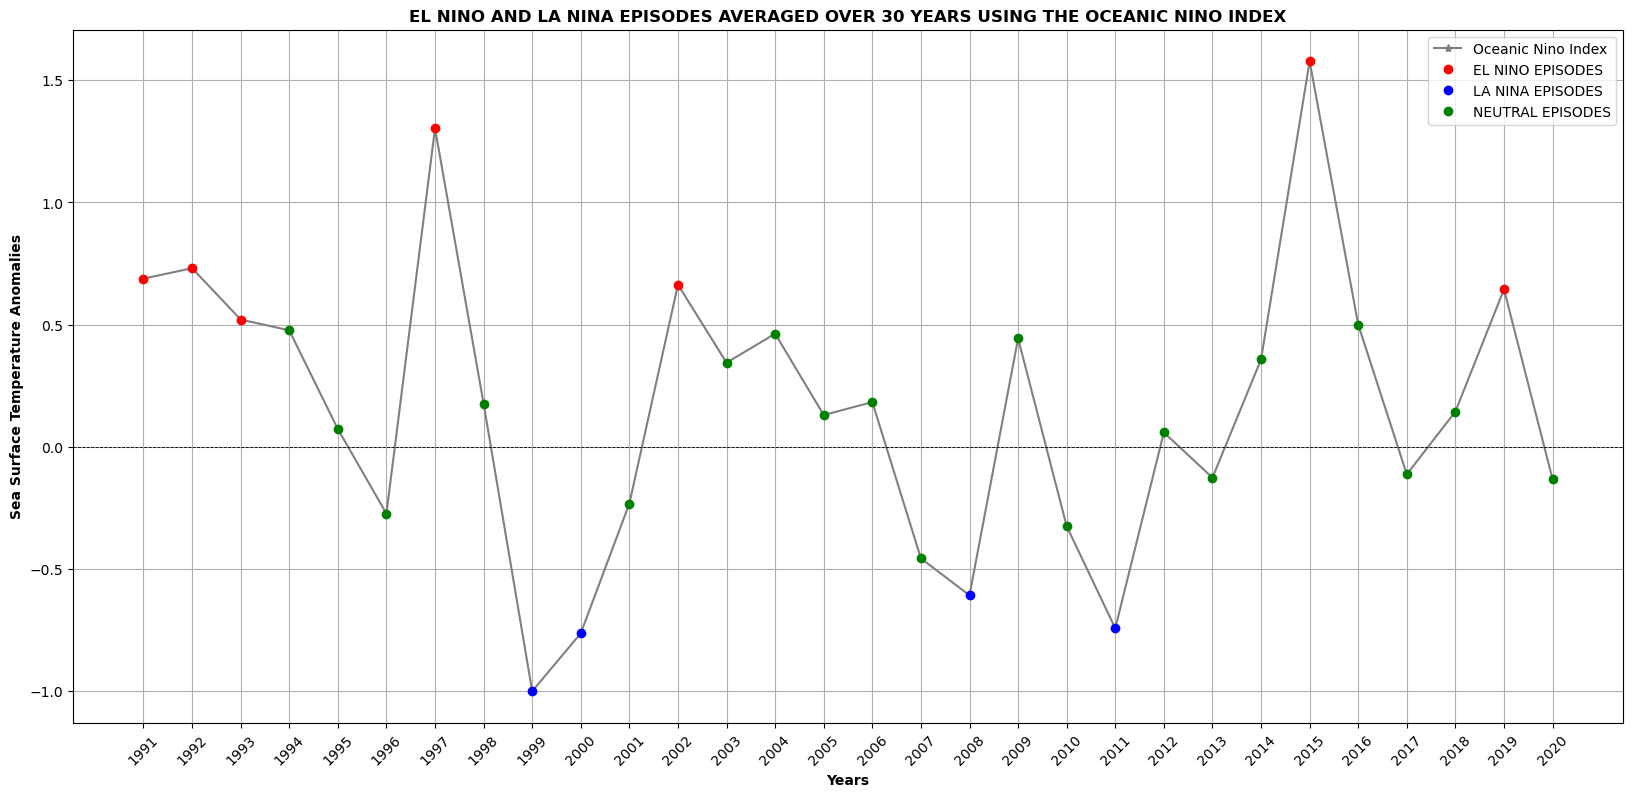

In [7]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(Year,ps_oni,marker='*',label='Oceanic Nino Index',color ='grey')
plt.axhline(0,color='black',linewidth=0.6, linestyle='--')
plotted_red = plt.plot([], [], 'ro', label='EL NINO EPISODES')
plotted_blue = plt.plot([], [], 'bo', label='LA NINA EPISODES')
plotted_green = plt.plot([], [], 'go', label='NEUTRAL EPISODES')
#changing markers
for year, value in zip(Year, ps_oni):
    if value >= 0.5:
        plt.plot(year, value, 'ro')
    elif value <= -0.5:
        plt.plot(year, value, 'bo')
    elif  -0.5 <=  value <= 0.5:
        plt.plot(year,value,'go')
        
#plt.axhline(0.5,color='r',label ='El Nino threshold',linewidth=0.8, linestyle='--')
#plt.axhline(-0.5,color='b',label ='La Nina threshold',linewidth=0.8, linestyle='--')
plt.xticks(rotation=45)
plt.legend()
plt.title('EL NINO AND LA NINA EPISODES AVERAGED OVER 30 YEARS USING THE OCEANIC NINO INDEX',color='black',fontweight='bold')
plt.xlabel('Years',color ='black',fontweight='bold')
plt.ylabel('Sea Surface Temperature Anomalies',fontweight='bold')
plt.grid()
plt.savefig('ENSO.png')

In [8]:
data= xr.open_dataset('chirps4.nc')
#selecting coordinates of study area


In [9]:
#RR = data.where(data != -99.0 ,np.nan)

d_ext= data['pr'].sel(lon=0.85, lat=9.4, method= 'nearest')
#d_ext

year_mn= d_ext.groupby('time.year').mean('time')
year_mn

<xarray.DataArray 'pr' (year: 30)>
array([4.1232877, 3.0846994, 3.6246576, 3.8931506, 4.235616 , 3.784153 ,
       4.3260274, 3.939726 , 4.1123285, 3.6448088, 3.0164382, 3.7041097,
       4.419178 , 3.6912568, 3.4657533, 3.3945205, 3.720548 , 3.5628414,
       4.3013697, 4.156164 , 3.7068493, 4.543716 , 3.2219179, 3.3643835,
       3.290411 , 3.896175 , 3.3561645, 3.7972603, 3.8027396, 3.1593406],
      dtype=float32)
Coordinates:
    lon      float64 0.875
    lat      float64 9.375
  * year     (year) int64 1991 1992 1993 1994 1995 ... 2016 2017 2018 2019 2020
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      total daily precipitation
    units:          mm/day

## CORRELATION OF NORTHERN REGION RAINFALL WITH ENSO

In [10]:
Year=['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
Months=['January','February','March','April','May','June','July','August','September','October','November','December']


In [11]:
correlation_value = np.corrcoef(ps_oni,year_mn)[0,1]
correlation_value

0.04723483315314746

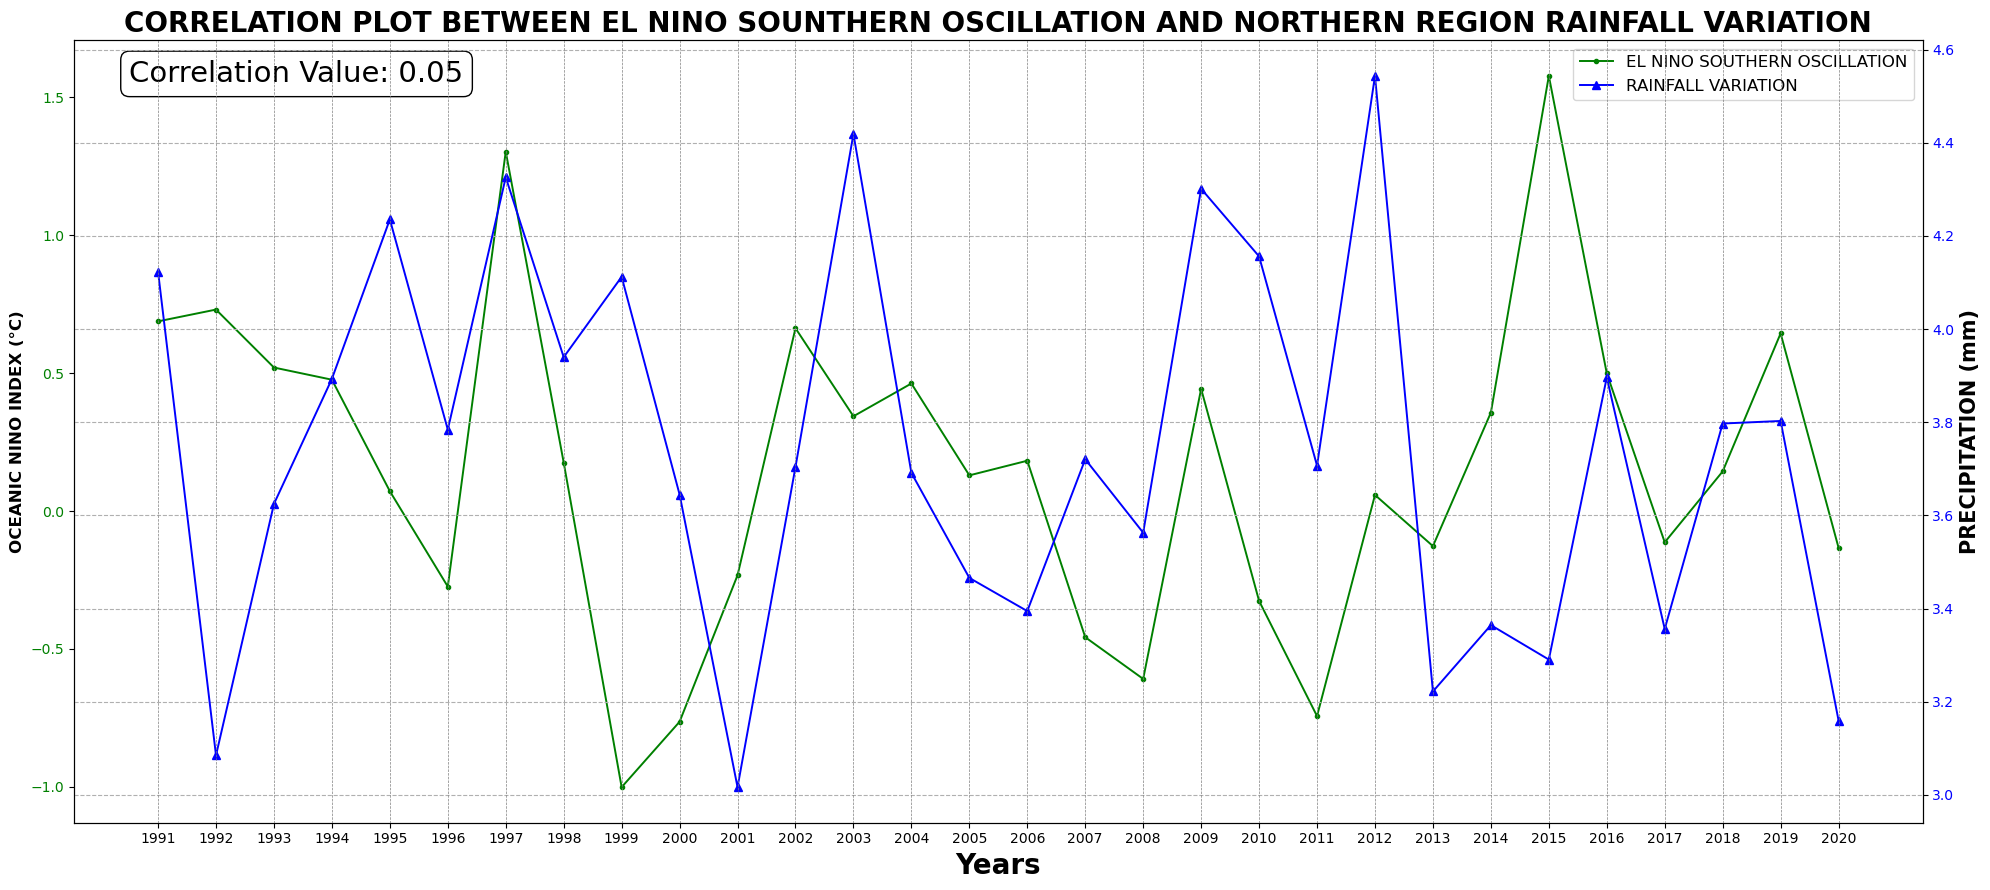

<Figure size 640x480 with 0 Axes>

In [14]:
fig, ax1 = plt.subplots(figsize = (20, 9))

# Plot the first dataset (temperature)
color = 'green'
ax1.set_xlabel('Years', fontsize=20, fontweight='bold')
ax1.set_ylabel('OCEANIC NINO INDEX (°C)', color='black', fontsize =12, fontweight='bold')
line1, = ax1.plot(Year, ps_oni, color=color, marker = '.', label = 'EL NINO SOUTHERN OSCILLATION', linewidth = 1.4)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('PRECIPITATION (mm)', color='black', fontsize =15, fontweight='bold')
line2, = ax2.plot(Year, year_mn, color=color, marker = '^', label = 'RAINFALL VARIATION', linewidth = 1.4)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('CORRELATION PLOT BETWEEN EL NINO SOUNTHERN OSCILLATION AND NORTHERN REGION RAINFALL VARIATION',fontsize=20, fontweight='bold')
#adding vertical grid lines
for x_val in Year:
    plt.axvline(x=x_val, color ='gray', linestyle ='--', linewidth = '0.5')
plt.grid(linestyle='--')
#annotating correlation value to plot
textstr = f'Correlation Value: {correlation_value:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
ax1.text(0.03, 0.975, textstr, transform=ax1.transAxes, fontsize=21,
         verticalalignment='top', bbox=props)


lines = [line1, line2]
ax1.legend(lines, [line.get_label() for line in lines], facecolor='white', fontsize=12, loc='upper right')
#plt.legend()
fig.tight_layout()
plt.show()
plt.savefig('NEW_ENSO_CORR.png')

In [49]:
from scipy.stats import pearsonr

# Assuming var1 and var2 are your variables
var1 = anoma
var2 = ps_oni

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(var1.values.flatten(), var2.values.flatten())

corr = print("Pearson Correlation Coefficient:", correlation_coefficient)
corr

Pearson Correlation Coefficient: 0.047234833153147485


## TABLE DISPLAY OF YEARS OF ENSO EPISODES

In [32]:
elnino_yrs =['1991','1992','1993','1997','2002','2015','2019']
neutral_yrs =['1994','1995','1996','1998','2001','2003','2004','2005','2006','2007','2009','2010','2012','2013','2014','2016','2017','2018','2020']
lanina_yrs =['1999','2000','2008','2011']

max_len = max(len(elnino_yrs),len(neutral_yrs),len(lanina_yrs))
elnino_yrs += [np.nan]*(max_len-len(elnino_yrs))
neutral_yrs += [np.nan]*(max_len-len(neutral_yrs))
lanina_yrs += [np.nan]*(max_len-len(lanina_yrs))

In [33]:
pd.DataFrame(
    {
        "EL-NINO YEARS":elnino_yrs,
        "LA NINA YEARS":lanina_yrs,
        "NEUTRAL YEARS":neutral_yrs,
        
    }
)

,EL-NINO YEARS,LA NINA YEARS,NEUTRAL YEARS
0,1991,1999,1994
1,1992,2000,1995
2,1993,2008,1996
3,1997,2011,1998
4,2002,NaN,2001
5,2015,NaN,2003
6,2019,NaN,2004
7,NaN,NaN,2005
8,NaN,NaN,2006
9,NaN,NaN,2007
